In [1]:
import sys
sys.path.remove('/opt/ros/kinetic/lib/python2.7/dist-packages')

In [76]:
#encoding:utf-9
from model_v2 import  *
from data import *
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import TensorBoard
#import keras.backend.tensorflow_backend as K
import matplotlib.pyplot as plt

#config = tf.compat.v1.ConfigProto
#config.gpu_options.allow_growth=True
#sess = tf.Session(config=config)
#K.set_session(sess)
#os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Found 30 images belonging to 1 classes.
Found 30 images belonging to 1 classes.


In [3]:
if __name__ == '__main__':

    #path to images which are prepared to train a model
    train_path = "data/phyto/train"
    image_folder = "images"
    label_folder = "labels"
    valid_path =  "data/phyto/validation"
    valid_image_folder ="val_imgs"
    valid_label_folder = "val_labels"
    log_filepath = './log'
    flag_multi_class = True
    num_classes = 3
    dp = data_preprocess(train_path=train_path,image_folder=image_folder,label_folder=label_folder,
                         valid_path=valid_path,valid_image_folder=valid_image_folder,valid_label_folder=valid_label_folder,
                         flag_multi_class=flag_multi_class,
                         num_classes=num_classes)

    # train your own model
    train_data = dp.trainGenerator(batch_size=2)
    valid_data = dp.validLoad(batch_size=2)
    test_data = dp.testGenerator()
    model = unet(num_class=num_classes)

    tb_cb = TensorBoard(log_dir=log_filepath)
    model_checkpoint = keras.callbacks.ModelCheckpoint('./model/phyto_model_v1.hdf5', monitor='val_loss',verbose=1,save_best_only=True)
    history = model.fit_generator(train_data,
                                  steps_per_epoch=200,epochs=5,
                                  validation_steps=10,
                                  validation_data=valid_data,
                                  callbacks=[model_checkpoint,tb_cb])

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 512, 512, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 512, 512, 64) 36928       conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 256, 256, 64) 0           conv2d_1[0][0]                   
______________________________________________________________________________________________

Found 198 images belonging to 1 classes.
Found 198 images belonging to 1 classes.
Epoch 1/5
200/200 [==============================] - ETA: 0s - loss: 0.0462 - accuracy: 0.9563 Found 30 images belonging to 1 classes.
Found 30 images belonging to 1 classes.

Epoch 00001: val_loss improved from inf to 0.04437, saving model to ./model/phyto_model_v1.hdf5
200/200 [==============================] - 3830s 19s/step - loss: 0.0462 - accuracy: 0.9563 - val_loss: 0.0444 - val_accuracy: 0.9607
Epoch 2/5
200/200 [==============================] - ETA: 0s - loss: 0.0390 - accuracy: 0.9656 
Epoch 00002: val_loss did not improve from 0.04437
200/200 [==============================] - 3783s 19s/step - loss: 0.0390 - accuracy: 0.9656 - val_loss: 0.0449 - val_accuracy: 0.9603
Epoch 3/5
200/200 [==============================] - ETA: 0s - loss: 0.0390 - accuracy: 0.9656 
Epoch 00003: val_loss improved from 0.04437 to 0.03249, saving model to ./model/phyto_model_v1.hdf5
200/200 [==========================

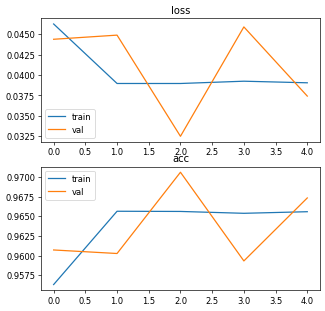

In [47]:
# draw the loss and accuracy curve
plt.figure(12, figsize=(6, 6), dpi=60)
plt.subplot(211)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('loss')
plt.legend()

plt.subplot(212)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('acc')
plt.legend()

plt.show()

In [48]:
# Save the model
model.save('/home/server/Desktop/phyto_new.h5')

In [49]:
print(test_data.shape)
# predictions = model.predict(test_data[:3])

AttributeError: 'generator' object has no attribute 'shape'

[[[[0.14901961 0.23137255 0.2745098 ]
   [0.16862745 0.29019608 0.34509804]
   [0.16078431 0.27843137 0.32941176]
   ...
   [0.18039216 0.30980392 0.36470588]
   [0.18039216 0.3254902  0.37647059]
   [0.16862745 0.26666667 0.31372549]]

  [[0.17647059 0.31764706 0.37254902]
   [0.19607843 0.39607843 0.45882353]
   [0.18823529 0.37647059 0.44313725]
   ...
   [0.20392157 0.41176471 0.49019608]
   [0.20784314 0.43529412 0.50588235]
   [0.2        0.35686275 0.41568627]]

  [[0.17254902 0.30588235 0.35686275]
   [0.19215686 0.37647059 0.43921569]
   [0.19215686 0.36470588 0.42745098]
   ...
   [0.2        0.39607843 0.46666667]
   [0.2        0.41176471 0.48235294]
   [0.18431373 0.3372549  0.4       ]]

  ...

  [[0.21176471 0.37254902 0.42352941]
   [0.21568627 0.41568627 0.49411765]
   [0.2        0.37254902 0.4627451 ]
   ...
   [0.78431373 0.78431373 0.78431373]
   [0.78431373 0.78431373 0.78431373]
   [0.78431373 0.78431373 0.78431373]]

  [[0.21960784 0.38431373 0.43137255]
   [0.2

[[[[1.00000000e+00 1.76831545e-28 0.00000000e+00]
   [1.00000000e+00 2.14111681e-34 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00 0.00000000e+00]
   ...
   [1.00000000e+00 4.05931582e-26 1.09533128e-30]
   [1.00000000e+00 6.32631290e-14 6.34419199e-19]
   [1.00000000e+00 7.91656185e-10 4.57115146e-09]]

  [[1.00000000e+00 0.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00 0.00000000e+00]
   ...
   [1.00000000e+00 0.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00 1.96456997e-31]
   [1.00000000e+00 2.39725249e-33 2.50812787e-15]]

  [[1.00000000e+00 0.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00 0.00000000e+00]
   ...
   [1.00000000e+00 0.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00 7.59044386e-22]]

  ...

  [[1.00000000e+00 0.00000000e+00 2.30774517e-27]
   [1.00000000e+

[[[[1.00000000e+00 2.38476169e-29 0.00000000e+00]
   [1.00000000e+00 1.82708800e-35 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00 0.00000000e+00]
   ...
   [1.00000000e+00 2.77210664e-30 1.41085194e-35]
   [1.00000000e+00 4.29779753e-16 7.05286734e-22]
   [1.00000000e+00 2.64068142e-11 2.01267267e-10]]

  [[1.00000000e+00 0.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00 0.00000000e+00]
   ...
   [1.00000000e+00 0.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00 1.98688105e-36]
   [1.00000000e+00 1.22335248e-38 1.07320663e-17]]

  [[1.00000000e+00 0.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00 0.00000000e+00]
   ...
   [1.00000000e+00 0.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00 2.78875519e-25]]

  ...

  [[1.00000000e+00 0.00000000e+00 4.29847176e-30]
   [1.00000000e+

[[[[1.00000000e+00 3.07984389e-28 0.00000000e+00]
   [1.00000000e+00 4.05380569e-34 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00 0.00000000e+00]
   ...
   [1.00000000e+00 2.43184430e-28 2.76771724e-33]
   [1.00000000e+00 4.32270983e-15 1.73814040e-20]
   [1.00000000e+00 1.29513650e-10 8.73513428e-10]]

  [[1.00000000e+00 0.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00 0.00000000e+00]
   ...
   [1.00000000e+00 0.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00 4.44663340e-34]
   [1.00000000e+00 3.79850266e-36 1.39984874e-16]]

  [[1.00000000e+00 0.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00 0.00000000e+00]
   ...
   [1.00000000e+00 0.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00 1.15438726e-23]]

  ...

  [[1.00000000e+00 0.00000000e+00 8.74395595e-28]
   [1.00000000e+

[[[[1.00000000e+00 1.17469641e-32 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00 0.00000000e+00]
   ...
   [1.00000000e+00 2.45352120e-33 0.00000000e+00]
   [1.00000000e+00 1.10648005e-17 4.31987095e-24]
   [1.00000000e+00 2.05190509e-12 1.93934035e-11]]

  [[1.00000000e+00 0.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00 0.00000000e+00]
   ...
   [1.00000000e+00 0.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00 1.81029963e-19]]

  [[1.00000000e+00 0.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00 0.00000000e+00]
   ...
   [1.00000000e+00 0.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00 7.56838853e-28]]

  ...

  [[1.00000000e+00 0.00000000e+00 3.59053315e-31]
   [1.00000000e+

[[[[1.0000000e+00 2.5546052e-28 0.0000000e+00]
   [1.0000000e+00 3.3628519e-34 0.0000000e+00]
   [1.0000000e+00 0.0000000e+00 0.0000000e+00]
   ...
   [1.0000000e+00 1.9144938e-28 1.9933903e-33]
   [1.0000000e+00 3.8191898e-15 1.3875330e-20]
   [1.0000000e+00 1.1271222e-10 7.6359696e-10]]

  [[1.0000000e+00 0.0000000e+00 0.0000000e+00]
   [1.0000000e+00 0.0000000e+00 0.0000000e+00]
   [1.0000000e+00 0.0000000e+00 0.0000000e+00]
   ...
   [1.0000000e+00 0.0000000e+00 0.0000000e+00]
   [1.0000000e+00 0.0000000e+00 3.1172088e-34]
   [1.0000000e+00 2.5041335e-36 1.1616848e-16]]

  [[1.0000000e+00 0.0000000e+00 0.0000000e+00]
   [1.0000000e+00 0.0000000e+00 0.0000000e+00]
   [1.0000000e+00 0.0000000e+00 0.0000000e+00]
   ...
   [1.0000000e+00 0.0000000e+00 0.0000000e+00]
   [1.0000000e+00 0.0000000e+00 0.0000000e+00]
   [1.0000000e+00 0.0000000e+00 8.9082055e-24]]

  ...

  [[1.0000000e+00 0.0000000e+00 1.3995306e-28]
   [1.0000000e+00 0.0000000e+00 0.0000000e+00]
   [1.0000000e+00 0.000000

[[[[1.0000000e+00 5.6471461e-25 0.0000000e+00]
   [1.0000000e+00 3.6181577e-30 0.0000000e+00]
   [1.0000000e+00 0.0000000e+00 0.0000000e+00]
   ...
   [1.0000000e+00 5.7547459e-26 1.6664767e-30]
   [1.0000000e+00 7.5711139e-14 8.2409642e-19]
   [1.0000000e+00 9.1277186e-10 5.1186166e-09]]

  [[1.0000000e+00 0.0000000e+00 0.0000000e+00]
   [1.0000000e+00 0.0000000e+00 0.0000000e+00]
   [1.0000000e+00 0.0000000e+00 0.0000000e+00]
   ...
   [1.0000000e+00 0.0000000e+00 0.0000000e+00]
   [1.0000000e+00 0.0000000e+00 3.0491764e-31]
   [1.0000000e+00 3.9217331e-33 3.1262656e-15]]

  [[1.0000000e+00 0.0000000e+00 0.0000000e+00]
   [1.0000000e+00 0.0000000e+00 0.0000000e+00]
   [1.0000000e+00 0.0000000e+00 0.0000000e+00]
   ...
   [1.0000000e+00 0.0000000e+00 0.0000000e+00]
   [1.0000000e+00 0.0000000e+00 0.0000000e+00]
   [1.0000000e+00 0.0000000e+00 1.0160043e-21]]

  ...

  [[1.0000000e+00 7.5622322e-38 1.1134577e-25]
   [1.0000000e+00 0.0000000e+00 0.0000000e+00]
   [1.0000000e+00 0.000000

[[[[1.0000000e+00 1.3122120e-28 0.0000000e+00]
   [1.0000000e+00 1.4747137e-34 0.0000000e+00]
   [1.0000000e+00 0.0000000e+00 0.0000000e+00]
   ...
   [1.0000000e+00 7.9873756e-29 7.4338244e-34]
   [1.0000000e+00 2.4137826e-15 7.8395542e-21]
   [1.0000000e+00 8.6995813e-11 6.0826683e-10]]

  [[1.0000000e+00 0.0000000e+00 0.0000000e+00]
   [1.0000000e+00 0.0000000e+00 0.0000000e+00]
   [1.0000000e+00 0.0000000e+00 0.0000000e+00]
   ...
   [1.0000000e+00 0.0000000e+00 0.0000000e+00]
   [1.0000000e+00 0.0000000e+00 1.1545350e-34]
   [1.0000000e+00 9.0854381e-37 7.3792743e-17]]

  [[1.0000000e+00 0.0000000e+00 0.0000000e+00]
   [1.0000000e+00 0.0000000e+00 0.0000000e+00]
   [1.0000000e+00 0.0000000e+00 0.0000000e+00]
   ...
   [1.0000000e+00 0.0000000e+00 0.0000000e+00]
   [1.0000000e+00 0.0000000e+00 0.0000000e+00]
   [1.0000000e+00 0.0000000e+00 4.5602570e-24]]

  ...

  [[1.0000000e+00 0.0000000e+00 4.1307302e-28]
   [1.0000000e+00 0.0000000e+00 0.0000000e+00]
   [1.0000000e+00 0.000000

[[[[1.00000000e+00 5.42780984e-23 3.54353573e-38]
   [1.00000000e+00 1.06996771e-27 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00 0.00000000e+00]
   ...
   [1.00000000e+00 2.57978717e-25 9.93328085e-30]
   [1.00000000e+00 1.65105166e-13 2.43303514e-18]
   [1.00000000e+00 1.56158420e-09 8.40375414e-09]]

  [[1.00000000e+00 0.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00 0.00000000e+00]
   ...
   [1.00000000e+00 0.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00 1.90931353e-30]
   [1.00000000e+00 2.73838668e-32 7.46085678e-15]]

  [[1.00000000e+00 0.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00 0.00000000e+00]
   ...
   [1.00000000e+00 0.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00 0.00000000e+00]
   [1.00000000e+00 0.00000000e+00 3.63852033e-21]]

  ...

  [[1.00000000e+00 8.42914684e-36 2.64013010e-24]
   [1.00000000e+

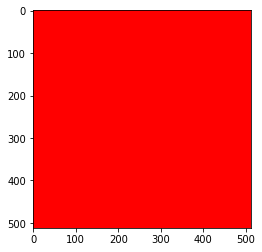

In [75]:
from model_v2 import *
from data import *
import numpy as np
import cv2
import os
import warnings

# warnings.filterwarnings("ignore")
# os.environ["CUDA_VISIBLE_DEVICES"] = "0"

def image_normalized(file_path):
    '''
    tif，size:512*512，gray
    :param dir_path: path to your images directory
    :return:
    '''
    img = cv2.imread(file_path)
    img_shape = img.shape
    image_size = (img_shape[1],img_shape[0])
    img_standard = cv2.resize(img, (512, 512), interpolation=cv2.INTER_CUBIC)
    img_new = img_standard
    img_new = np.asarray([img_new / 255.])
    print(img_new)
    return img_new,image_size


if __name__ == '__main__':

    #path to images which aring wating for predicting
    test_path = "data/phyto/test"

    # save the predict images
    save_path = "data/phyto/predicted_results"

    dp = data_preprocess(test_path=test_path,save_path=save_path,flag_multi_class=True,num_classes=3)

    #load model
    # model = load_model('./model/CamVid_model_v1.hdf5')

    for name in os.listdir(test_path):
        image_path = os.path.join(test_path,name)
        x,img_size = image_normalized(image_path)
        results = model.predict(x)
        print(results)
        res2 = np.squeeze(results, axis=0)
        plt.imshow(res2)
        # dp.saveResult([results[0]],img_size,name.split('.')[0])

In [78]:
from predict import show_predictions_in_test

show_predictions_in_test()

IndexError: index 1 is out of bounds for axis 0 with size 1